<a href="https://colab.research.google.com/github/RohanC07/HealthCare/blob/main/Data_Analysis_Task_summative_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science in Healthcare
## Data Analysis Task - summative assessment  


You have been given access to data on patients attending an emergency department. The data contains measurements taken from patients at various time points, alongside other sociodemographic and health data.

You are asked to predict which adult patients have a critical incident within 72 hours of admission (`crit_72`).

Your classification model should be usable on admission to the emergency department.

The `Data Analysis Task: data` folder on the VLE contains three files:
- `training_data.csv` – details of a subset of patients, with `crit_72` disclosed
- `test_data.csv` – details of a subset of patients, with `crit_72` not disclosed
- `data_dictionary.gdoc` – the data dictionary for these data

*Note: These data are based on real patient data but are synthetic*

You will need to pre-process the training and test datasets. You are asked to include a binary feature representing whether a patient has multimorbidity (`1 = multimorbidity`, `0 = no multimorbidity`), based on `num_diagnoses`. Convert `num_diagnoses` into a binary feature, using an appropriate threshold. Justify your choice.

Once you have pre-processed the data, you are asked to do two data analysis tasks:

**1 - Build an ensemble model**

- Use the training data to build an ensemble model to predict `crit_72`
- Show evidence that you have considered multiple different types of ensemble model
- Optimise your ensemble models for balanced accuracy score

Based on your findings, choose **one** of your ensemble models to take forward as your final model

- Plot the calibration curve of your chosen ensemble, and recalibrate the predicted probabilities using an appropriate method
- Provide some interpretation of your final model
- Use your final model to predict the class label for those individuals in `test_data.csv`. Save your predicted classes as `y_predict_ensemble`. These predictions will be compared to `y_test`, which you do *not* have access to. The performance of your final ensemble model on the test data will contribute to your mark for this question

**2 - Build a logistic regression model**

- Use the training data to build a logistic regression model to predict `crit_72`
- Assess the balanced accuracy score
- Based on your findings, would you recommend using this model instead of your ensemble model? Provide a comment that explains your choice. You do *not* need to use your logistic regression model to predict the class label for those individuals in `test_data.csv`.


Ensure your final notebook is complete and runs without error. If you cannot get any component of your code to run, then comment it out and explain what you were trying to do.

Your code should be commented, and you should also include text sections in your notebook providing additional background information and any references needed to explain your code.

[The marking rubric for the Data Analysis Task is available here](https://docs.google.com/document/d/1XwlJmmi8_iAgTHdD7-3pltPMdJ0_0oQDxZi1YlVBusg/edit?usp=sharing)

When you have finished, download this notebook as an .ipynb format, and upload it to the submission point called `Data Analysis Task: submission point` on the VLE by the deadline.

You do not need to upload any data.

You must include a cover sheet with your submission - this is available in the Assessment folder of the VLE (`PGT Cover Sheet`). You should put the word count as 'not applicable' on the cover sheet for this assignment.

# 1. **Import Drive**

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. **Load and Inspect the Data**

In [89]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading the datas
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assesment/Data Science in HealthCare/training_data (1).csv")
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assesment/Data Science in HealthCare/test_data (1).csv")

**missingno** is a package specifically designed to help visualise any missing data.

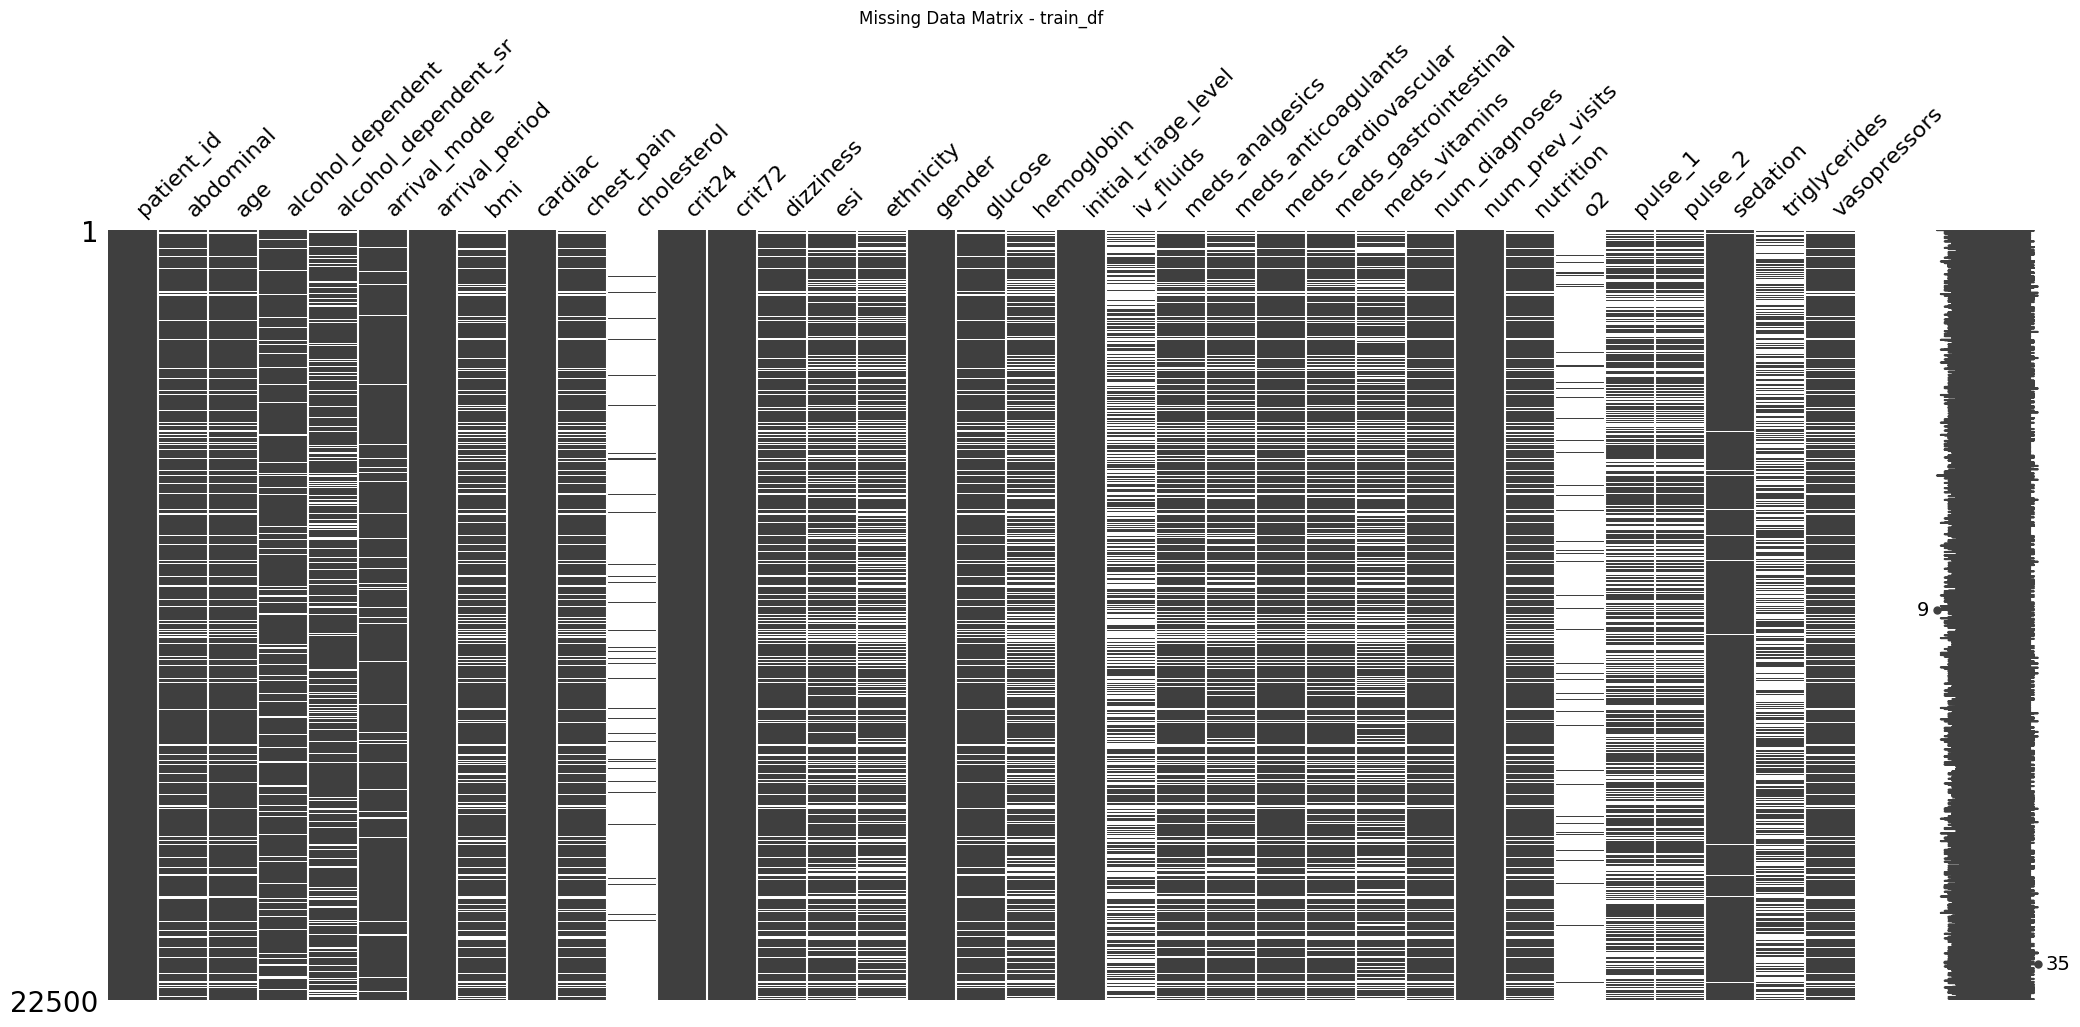

In [90]:
# Add missingno visualizations here:
import missingno as msno
# Create a matrix visualization to display the presence and absence of missing data across rows and columns
msno.matrix(train_df)
plt.title('Missing Data Matrix - train_df')
plt.show()

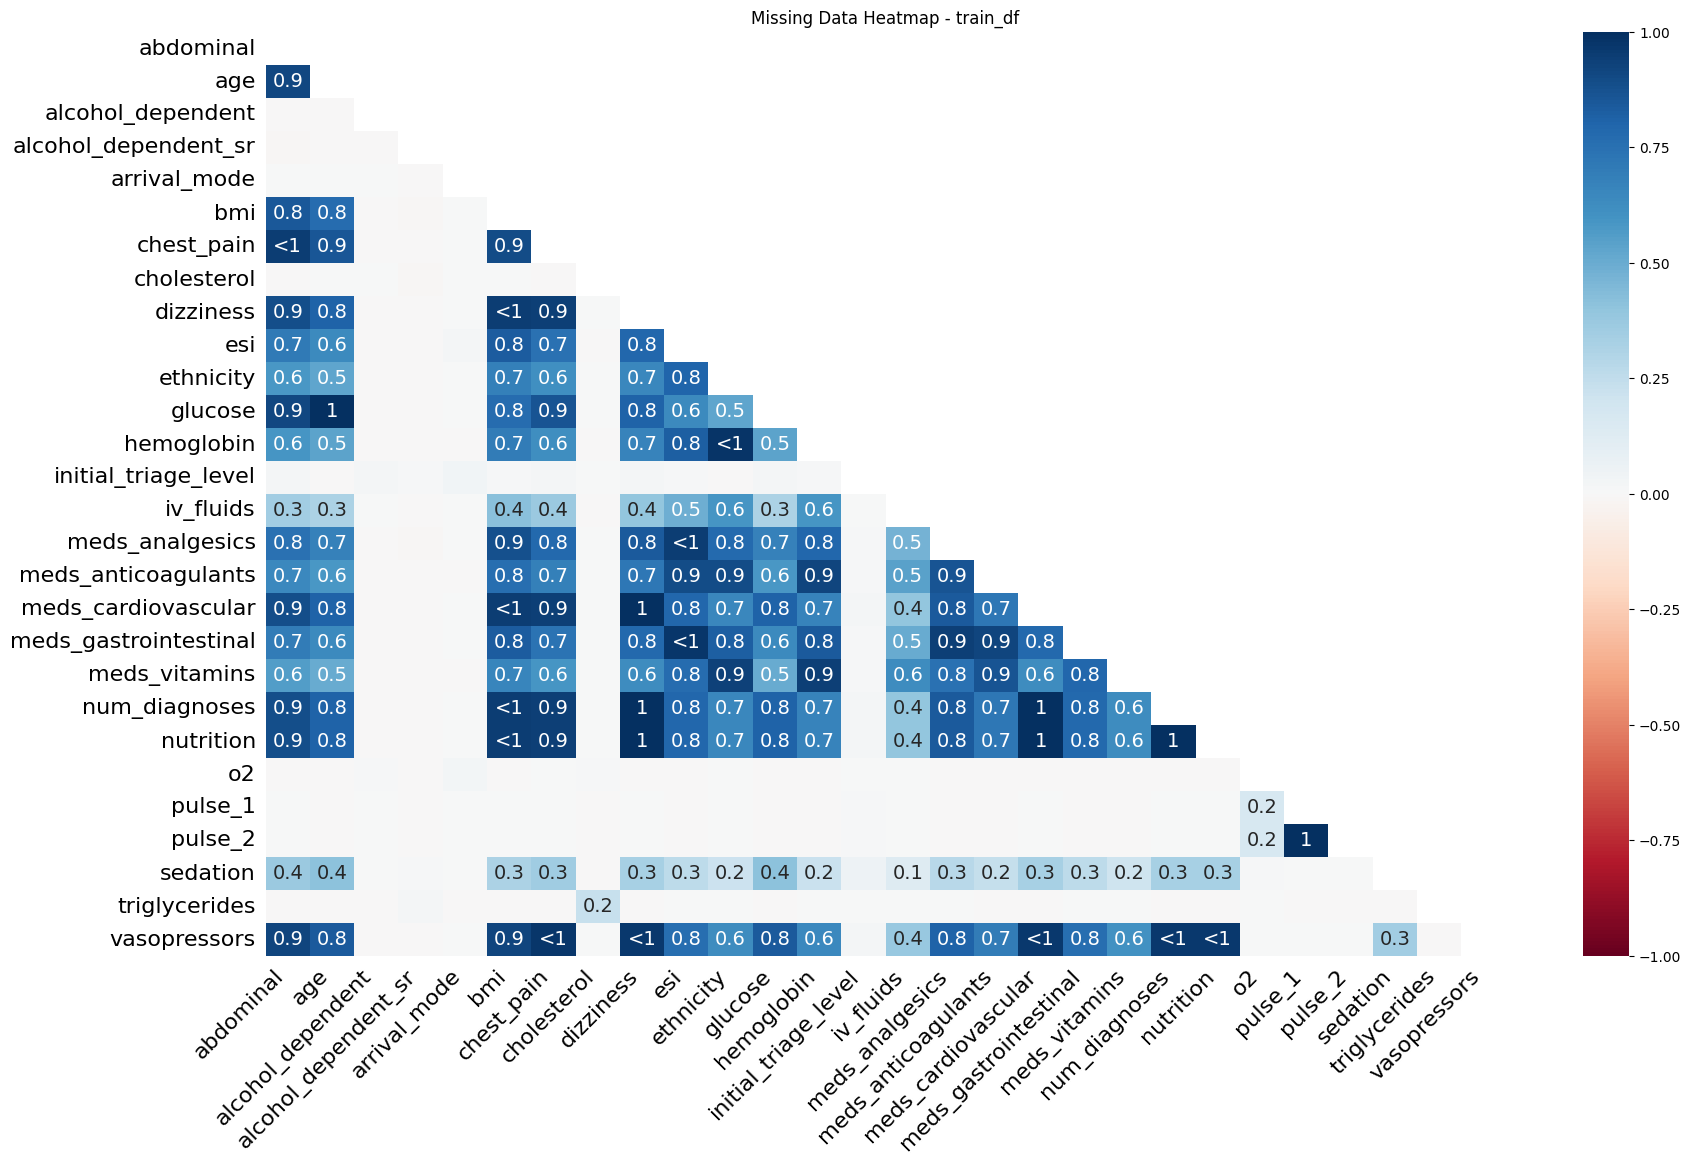

In [91]:
# Generate a heatmap visualization showing the correlation of missingness between features
msno.heatmap(train_df)
# Add a title to the heatmap
plt.title('Missing Data Heatmap - train_df')
plt.show()

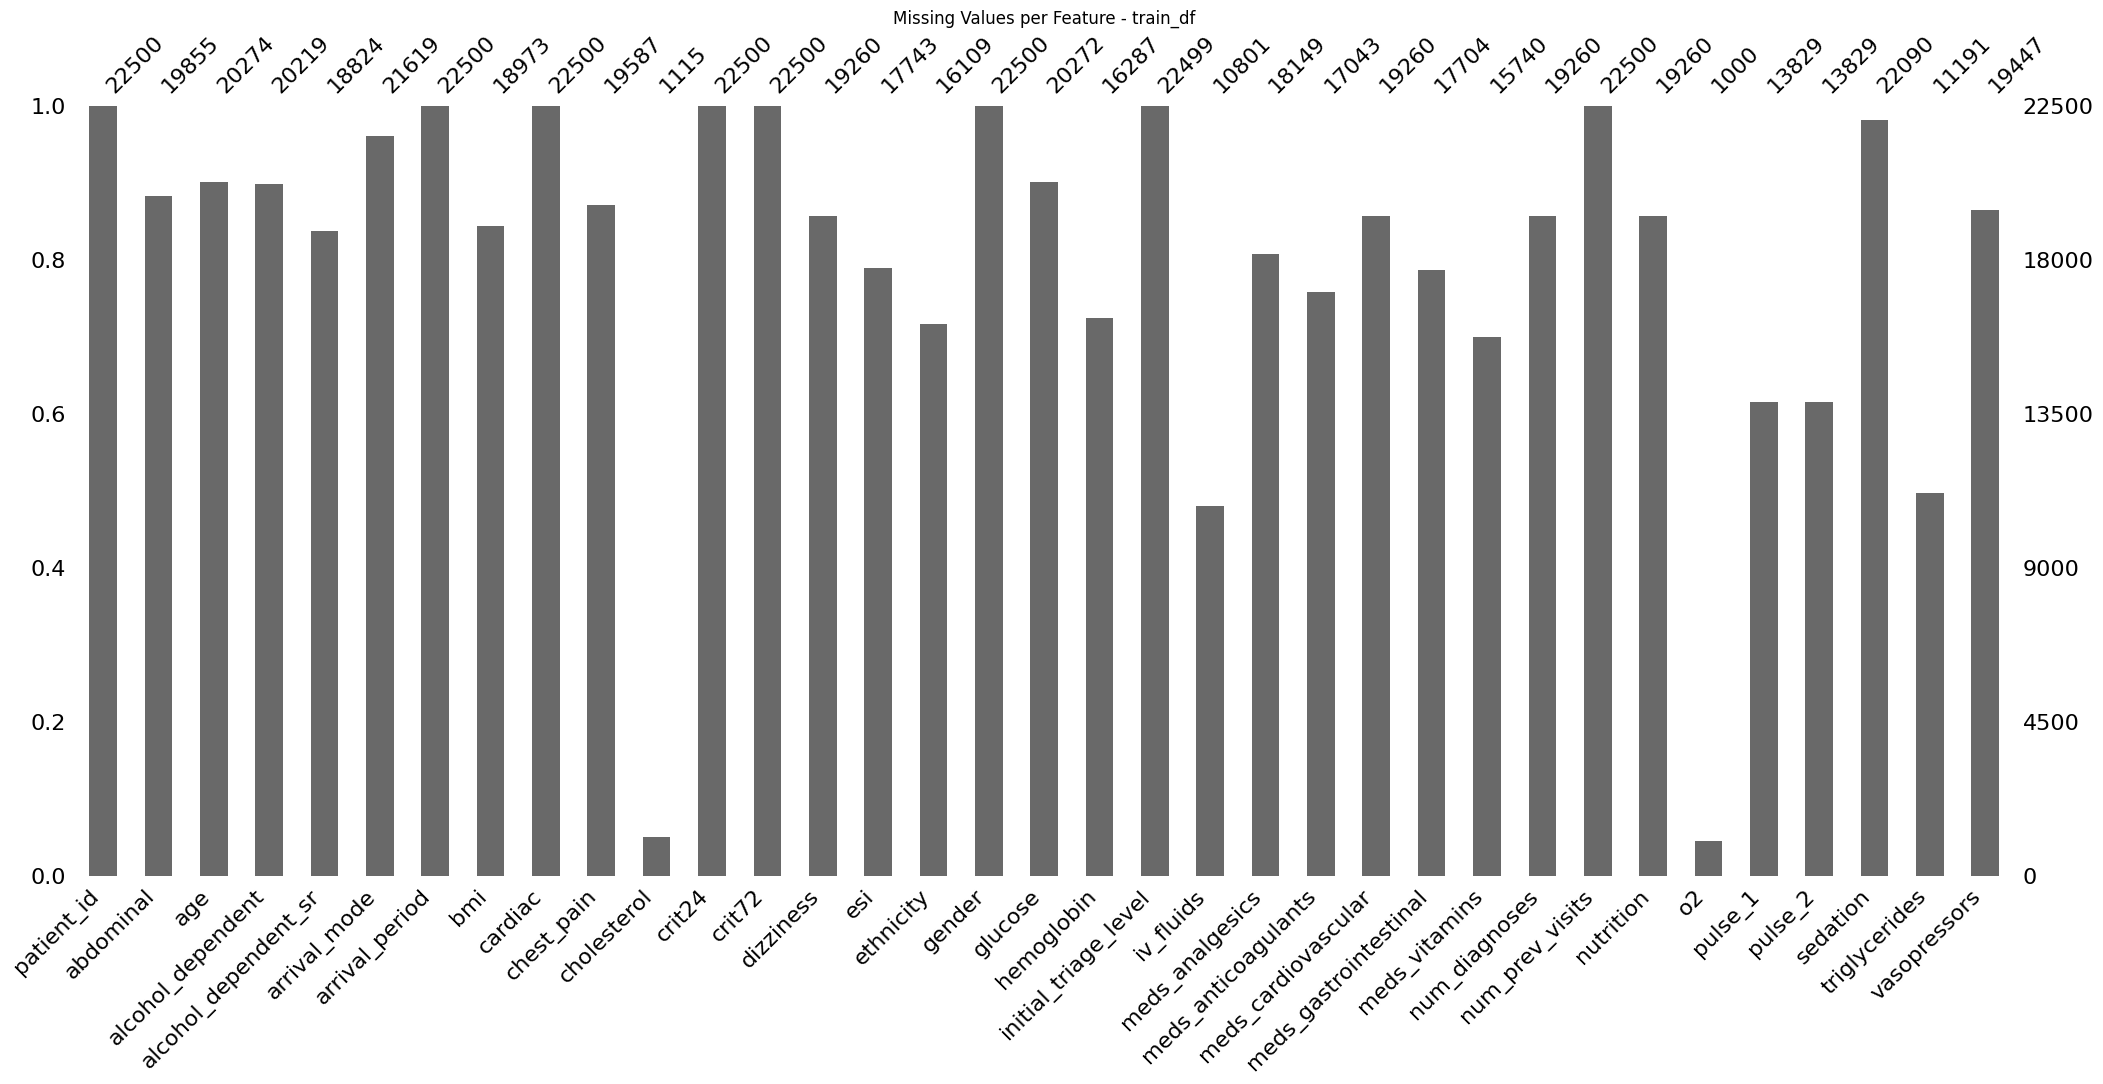

In [92]:
#Visualize missing data in the training dataframe using a bar plot
msno.bar(train_df)
# Add a title to the bar plot
plt.title('Missing Values per Feature - train_df')
plt.show()

In [93]:
#loading the train dataset
train_df

,patient_id,abdominal,age,alcohol_dependent,alcohol_dependent_sr,arrival_mode,arrival_period,bmi,cardiac,chest_pain,...,meds_vitamins,num_diagnoses,num_prev_visits,nutrition,o2,pulse_1,pulse_2,sedation,triglycerides,vasopressors
0,24401002,NaN,NaN,1.0,1.0,0.0,0.0,NaN,0.0,NaN,...,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,70917652,NaN,19.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,75289034,0.0,27.0,1.0,0.0,1.0,1.0,22.170000,0.0,0.0,...,NaN,1.0,2.0,1.0,NaN,74.5,67.5,1.0,NaN,0.0
3,96897935,0.0,25.0,0.0,0.0,NaN,0.0,31.820000,1.0,0.0,...,0.0,0.0,3.0,1.0,NaN,80.9,76.4,1.0,145.10001,0.0
4,55769018,0.0,86.0,0.0,0.0,1.0,0.0,27.870001,1.0,0.0,...,1.0,0.0,9.0,0.0,NaN,NaN,NaN,0.0,88.50000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,52150607,0.0,30.0,1.0,0.0,0.0,0.0,26.070000,1.0,0.0,...,NaN,0.0,3.0,1.0,NaN,NaN,NaN,0.0,136.70000,0.0
22496,32604478,0.0,23.0,1.0,0.0,NaN,1.0,26.680000,1.0,0.0,...,0.0,2.0,3.0,1.0,NaN,79.4,76.3,1.0,NaN,0.0
22497,36609249,0.0,27.0,0.0,0.0,0.0,1.0,20.969999,0.0,0.0,...,0.0,0.0,1.0,0.0,NaN,70.3,59.5,1.0,133.10001,0.0
22498,72144522,0.0,41.0,NaN,NaN,0.0,1.0,16.400000,1.0,0.0,...,0.0,0.0,3.0,0.0,NaN,59.0,53.0,1.0,124.60000,0.0


In [94]:
#loading the test dataset
test_df

,patient_id,abdominal,age,alcohol_dependent,alcohol_dependent_sr,arrival_mode,arrival_period,bmi,cardiac,chest_pain,...,meds_vitamins,num_diagnoses,num_prev_visits,nutrition,o2,pulse_1,pulse_2,sedation,triglycerides,vasopressors
0,70260834,0.0,52.0,1.0,0.0,NaN,0.0,21.410000,0.0,0.0,...,0.0,2.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,0.0
1,60797263,0.0,91.0,0.0,NaN,1.0,1.0,26.530001,0.0,0.0,...,NaN,3.0,10.0,1.0,NaN,76.2,71.7,1.0,NaN,1.0
2,47002528,0.0,49.0,1.0,1.0,0.0,0.0,30.870001,0.0,0.0,...,1.0,1.0,7.0,1.0,NaN,63.9,56.0,0.0,NaN,0.0
3,86348690,NaN,NaN,1.0,1.0,0.0,1.0,NaN,0.0,NaN,...,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,174.3,NaN
4,68668403,0.0,42.0,1.0,1.0,0.0,1.0,23.990000,1.0,0.0,...,0.0,2.0,2.0,0.0,NaN,60.7,53.9,0.0,181.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,76837039,0.0,52.0,1.0,1.0,NaN,1.0,21.230000,1.0,0.0,...,0.0,3.0,6.0,1.0,NaN,52.6,47.9,1.0,NaN,0.0
7496,92453943,1.0,27.0,0.0,0.0,0.0,1.0,29.480000,1.0,0.0,...,0.0,1.0,0.0,0.0,91.0,77.0,70.2,1.0,NaN,0.0
7497,47815384,0.0,42.0,1.0,NaN,1.0,0.0,26.559999,0.0,0.0,...,0.0,0.0,5.0,1.0,NaN,NaN,NaN,1.0,168.3,0.0
7498,11627770,0.0,77.0,0.0,0.0,0.0,1.0,29.719999,1.0,0.0,...,0.0,1.0,11.0,0.0,NaN,NaN,NaN,1.0,NaN,0.0


In [95]:
# Check for target variable presence
print("Training Data Columns:", train_df.columns)
print("Missing values in crit72:", train_df['crit72'].isnull().sum())

Training Data Columns: Index(['patient_id', 'abdominal', 'age', 'alcohol_dependent',
       'alcohol_dependent_sr', 'arrival_mode', 'arrival_period', 'bmi',
       'cardiac', 'chest_pain', 'cholesterol', 'crit24', 'crit72', 'dizziness',
       'esi', 'ethnicity', 'gender', 'glucose', 'hemoglobin',
       'initial_triage_level', 'iv_fluids', 'meds_analgesics',
       'meds_anticoagulants', 'meds_cardiovascular', 'meds_gastrointestinal',
       'meds_vitamins', 'num_diagnoses', 'num_prev_visits', 'nutrition', 'o2',
       'pulse_1', 'pulse_2', 'sedation', 'triglycerides', 'vasopressors'],
      dtype='object')
Missing values in crit72: 0


In [96]:
# Basic data exploration
print("Basic statistics:")
print(train_df.describe())

Basic statistics:
         patient_id     abdominal           age  alcohol_dependent  \
count  2.250000e+04  19855.000000  20274.000000       20219.000000   
mean   5.502583e+07      0.014153     49.796784           0.563925   
std    2.597420e+07      0.118123     20.401230           0.495909   
min    1.001648e+07      0.000000     11.000000           0.000000   
25%    3.271544e+07      0.000000     32.000000           0.000000   
50%    5.520055e+07      0.000000     49.000000           1.000000   
75%    7.730411e+07      0.000000     64.000000           1.000000   
max    9.999750e+07      1.000000    151.000000           1.000000   

       alcohol_dependent_sr  arrival_mode  arrival_period           bmi  \
count          18824.000000  21619.000000    22500.000000  18973.000000   
mean               0.267743      0.350247        0.646800     24.970790   
std                0.442795      0.477058        0.477975      4.039899   
min                0.000000      0.000000        0.

In [97]:
# Check for unreasonable values
print("Max age:", train_df['age'].max())

Max age: 151.0


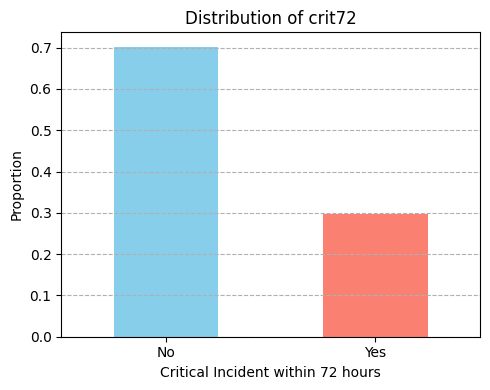

In [98]:
# Visualize Class Imbalance
plt.figure(figsize=(5, 4))
train_df['crit72'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of crit72')
plt.xlabel('Critical Incident within 72 hours')
plt.ylabel('Proportion')
# Customize x-axis ticks: set tick positions and corresponding labels
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
# Add dashed grid lines only along the y-axis for better readability
plt.grid(axis='y', linestyle='--')
# Adjust subplot parameters to give some padding and prevent clipping of labels/titles
plt.tight_layout()
plt.show()

# 3. **Drop Features Measured Too Late**

In [99]:
# These may include vitals recorded at later stages, e.g., pulse_3, etc.
# Identify columns that represent features measured too late in the timeline,
# such as those containing '_3' (e.g., measurements at timepoint 3) or the word 'later'
late_features = [col for col in train_df.columns if '_3' in col or 'later' in col]

# Drop these late-measured features from both training and test datasets,
# because they may leak future information or are not available at the prediction time
train_df.drop(columns=late_features, inplace=True, errors='ignore')
test_df.drop(columns=late_features, inplace=True, errors='ignore')

# 4. **Create Multimorbidity Feature**

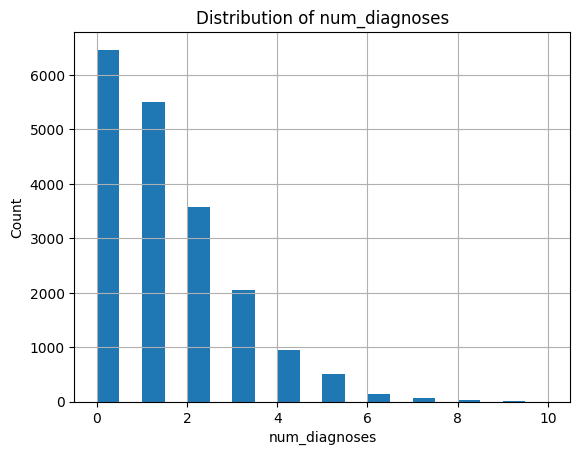

In [100]:
# Explore num_diagnoses distribution
train_df['num_diagnoses'].hist(bins=20)
plt.title('Distribution of num_diagnoses')
plt.xlabel('num_diagnoses')
plt.ylabel('Count')
plt.show()

In [101]:
# Define multimorbidity: threshold = 2 or more diagnoses (justified by literature)
'''Multimorbidity is operationally defined as the presence of two or more diagnoses in a patient, consistent with the literature (e.g., Fortin et al., 2012; Barnett et al., 2012),
since having multiple coexisting conditions significantly affects clinical outcomes and healthcare complexity.'''

threshold = 2

train_df['multimorbidity'] = (train_df['num_diagnoses'] >= threshold).astype(int)
test_df['multimorbidity'] = (test_df['num_diagnoses'] >= threshold).astype(int)

# 5. **Handle Missing Values and Encode Categorical Variables**

In [102]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [103]:
# Drop patient_id and crit72 from features
X = train_df.drop(columns=['patient_id', 'crit72'])
y = train_df['crit72']
X_test = test_df.drop(columns=['patient_id'])

In [104]:
# Exploratory missing value analysis
missing_counts = X.isnull().sum()
print("Missing values per feature:")
print(missing_counts[missing_counts > 0])

Missing values per feature:
abdominal                 2645
age                       2226
alcohol_dependent         2281
alcohol_dependent_sr      3676
arrival_mode               881
bmi                       3527
chest_pain                2913
cholesterol              21385
dizziness                 3240
esi                       4757
ethnicity                 6391
glucose                   2228
hemoglobin                6213
initial_triage_level         1
iv_fluids                11699
meds_analgesics           4351
meds_anticoagulants       5457
meds_cardiovascular       3240
meds_gastrointestinal     4796
meds_vitamins             6760
num_diagnoses             3240
nutrition                 3240
o2                       21500
pulse_1                   8671
pulse_2                   8671
sedation                   410
triglycerides            11309
vasopressors              3053
dtype: int64


In [105]:
# Convert categorical features to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [106]:
# Align the columns of test data to training data
X_test = X_test.reindex(columns=X.columns, fill_value=0)

In [107]:
from sklearn.impute import KNNImputer

# Imputation using KNN Imputer
# Initialize K-Nearest Neighbors imputer with 5 neighbors to fill missing values
imputer = KNNImputer(n_neighbors=5)

# Fit the imputer on training features and transform to fill missing values
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Use the trained imputer to fill missing values in the test features
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


In [108]:
# Import StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

# Initialize the scaler which standardizes features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it to scale features
X_scaled = scaler.fit_transform(X_imputed)

# Use the same scaler to transform the test data (without refitting)
X_test_scaled = scaler.transform(X_test_imputed)


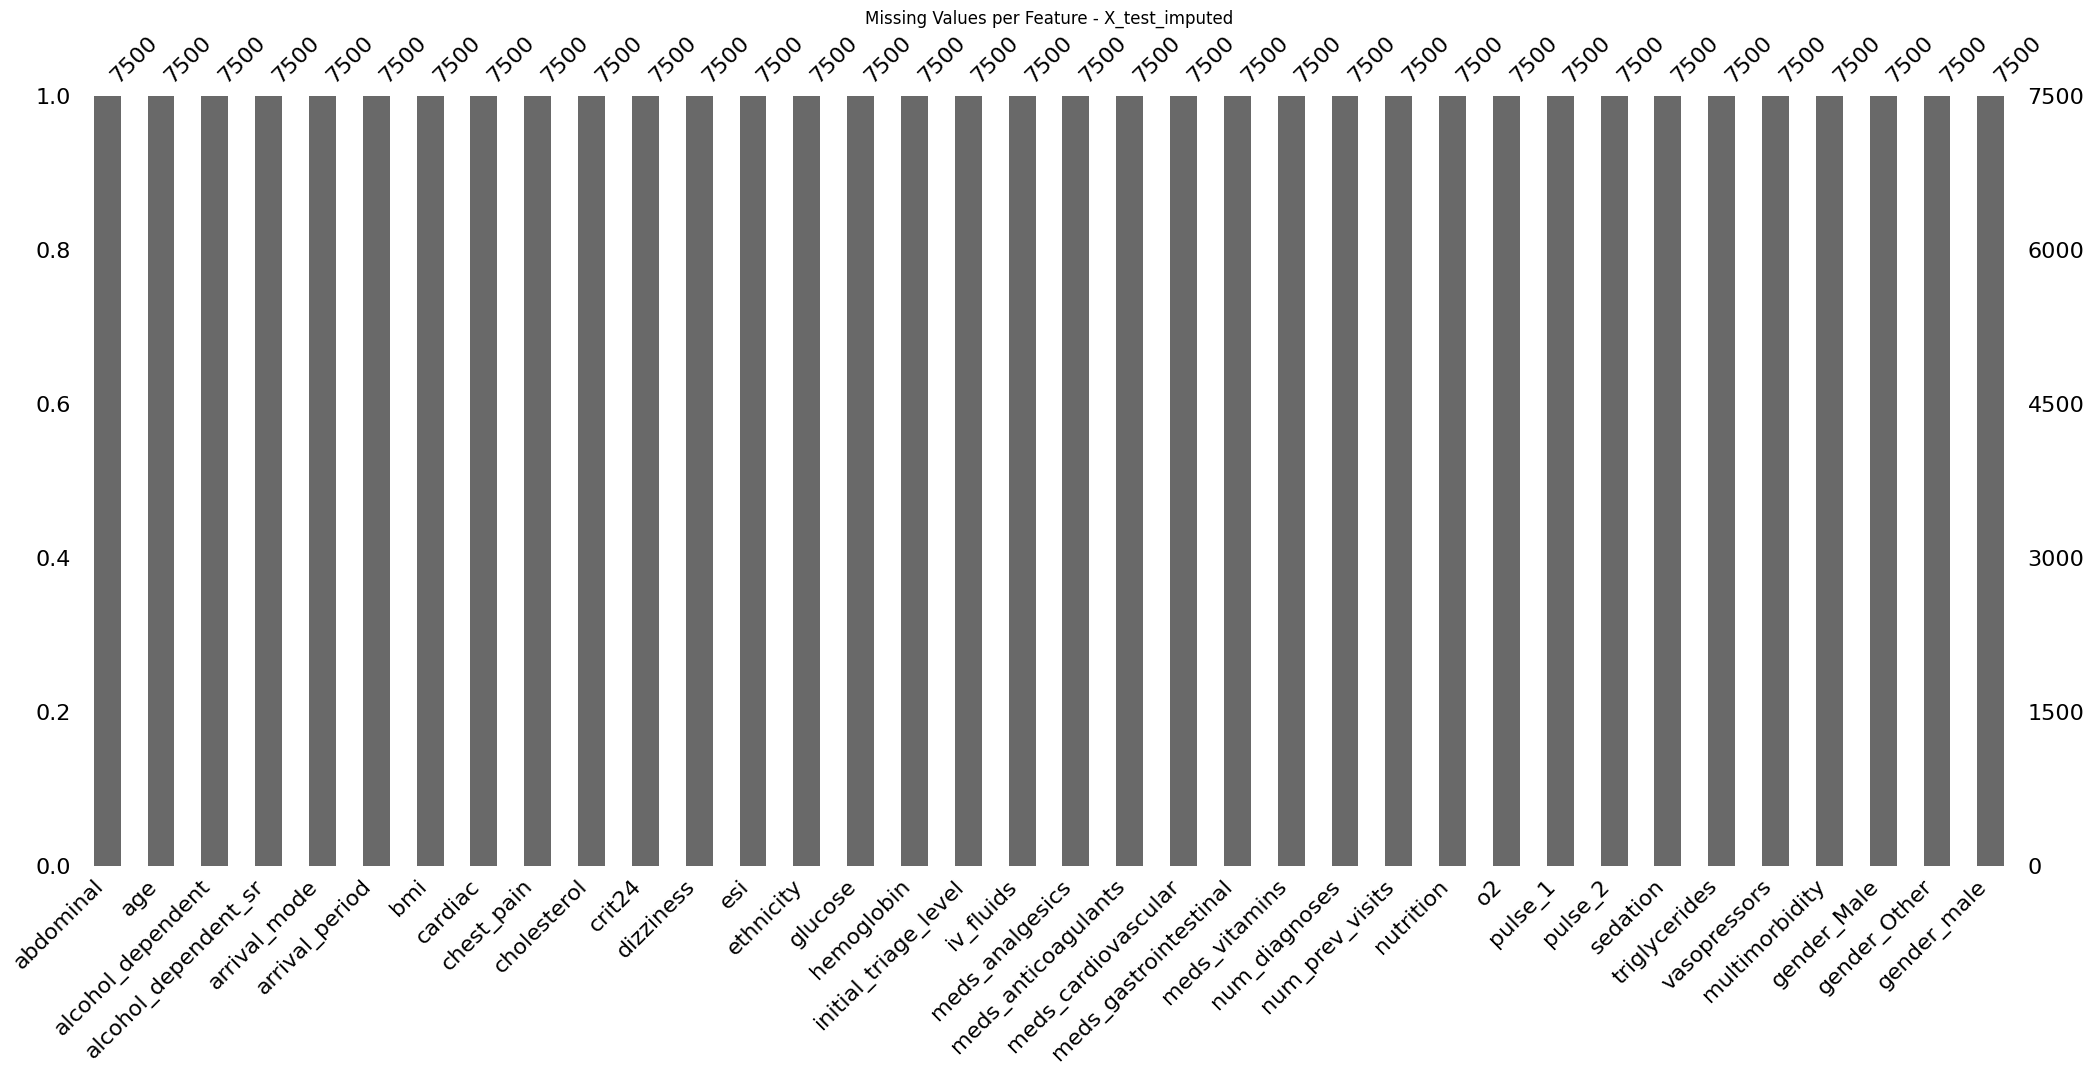

In [109]:
# Set the figure size to make the plot wider and shorter
plt.figure(figsize=(8, 4))

# Create a bar plot showing the count of non-missing values per feature in the imputed test dataset
msno.bar(X_test_imputed)

# Add a descriptive title to the plot
plt.title('Missing Values per Feature - X_test_imputed')

# Display the plot
plt.show()


# 6. **Split data for validation**

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [111]:
# Justification: validation set helps tune hyperparameters and avoid overfitting

# 7.  **Train and Tune Ensemble Models**

In [112]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score

In [113]:
# Initialize a Random Forest classifier with balanced class weights to handle class imbalance
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define a grid of hyperparameters to tune:
# - n_estimators: number of trees in the forest
# - max_depth: maximum depth of each tree (None means unlimited depth)
# - min_samples_split: minimum number of samples required to split an internal node
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Use GridSearchCV to perform 3-fold cross-validation over the hyperparameter grid
# Use balanced_accuracy as the scoring metric to handle imbalanced classes
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='balanced_accuracy')

# Fit the grid search on training data to find the best hyperparameters
grid_rf.fit(X_train, y_train)

# Extract the best Random Forest model found by grid search
best_rf = grid_rf.best_estimator_


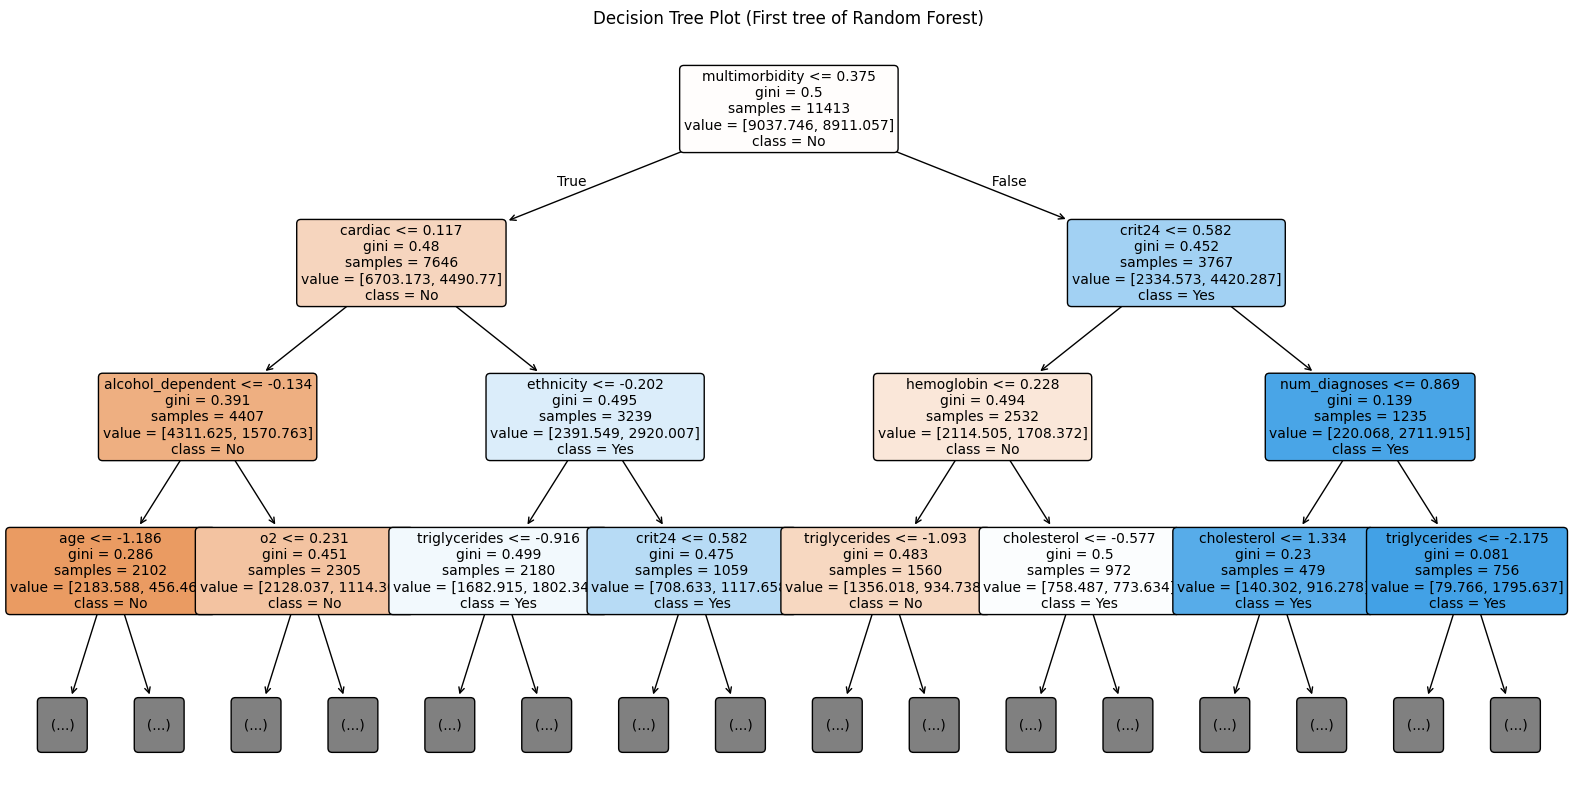

In [114]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot one decision tree from the Random Forest ensemble (here, the first tree)
plt.figure(figsize=(20,10))  # Large figure size for better visibility

# Visualize the structure of the selected tree:
# - feature_names: to label nodes with feature names
# - class_names: to label leaf nodes with target class names (adjust as needed)
# - filled: color nodes by majority class
# - rounded: rounded box style for nodes
# - max_depth: limit depth of the tree plot to 3 for clarity and readability
# - fontsize: set font size for node text
plot_tree(best_rf.estimators_[0],
          feature_names=X.columns,
          class_names=['No', 'Yes'],
          filled=True, rounded=True,
          max_depth=3,
          fontsize=10)

plt.title('Decision Tree Plot (First tree of Random Forest)')
plt.show()


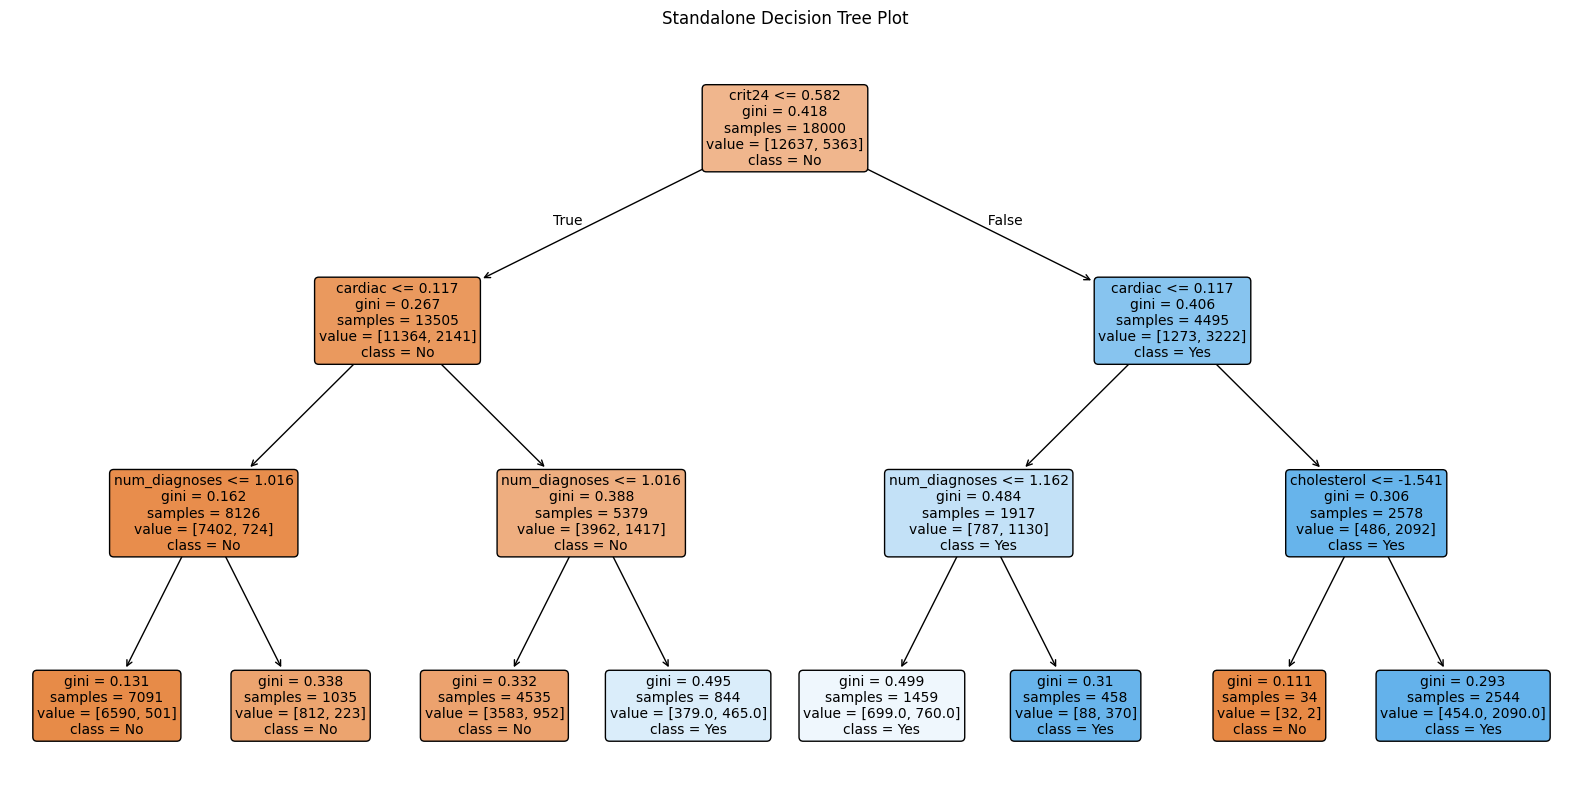

In [115]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Train a standalone decision tree with max depth 3 for simplicity and interpretability
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))  # Large figure for better readability
plot_tree(dt,
          feature_names=X.columns,  # Use feature names for node labels
          class_names=['No', 'Yes'],  # Class names for target labels (adjust if needed)
          filled=True,  # Color nodes based on majority class
          rounded=True,  # Rounded corners on nodes
          fontsize=10)  # Font size for text in nodes
plt.title('Standalone Decision Tree Plot')
plt.show()


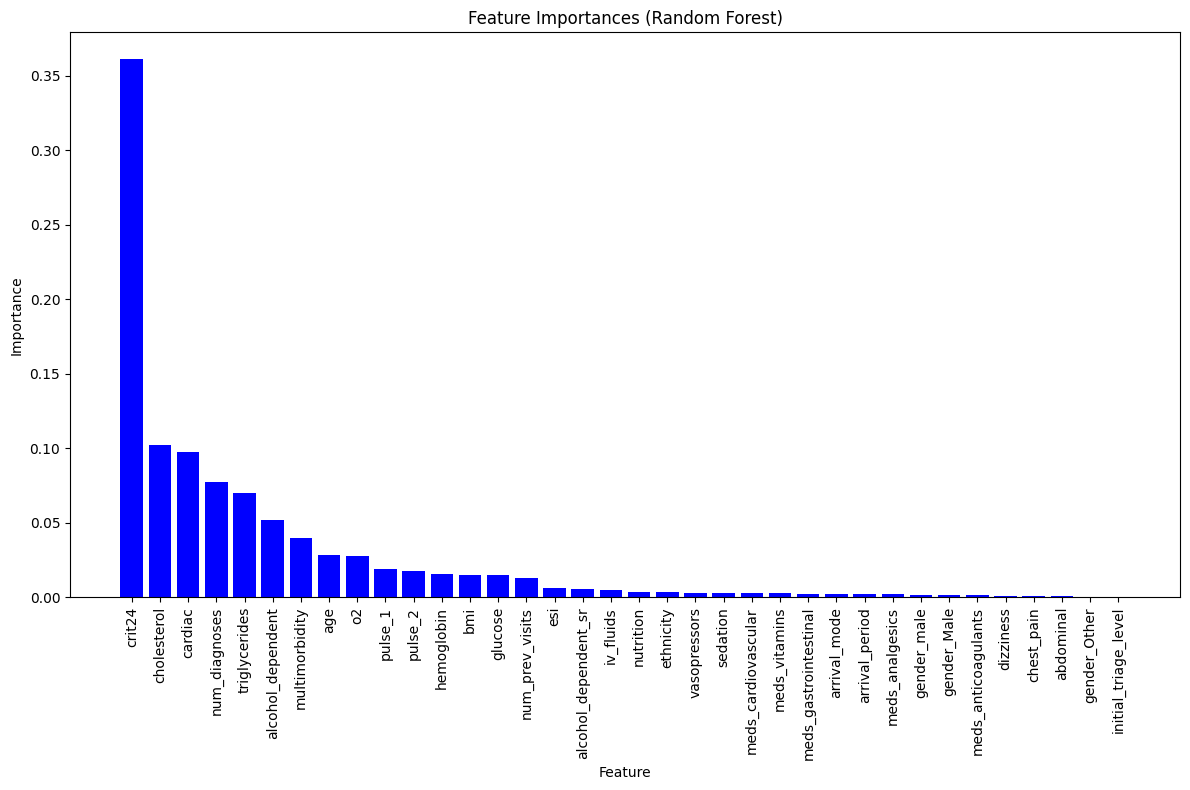

In [116]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances from the best random forest
importances = best_rf.feature_importances_
features = X.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(importances)), importances[indices], color='b', align='center')
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [117]:
# Hyperparameter tuning for Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Initialize Gradient Boosting Classifier with a fixed random state for reproducibility
gb = GradientBoostingClassifier(random_state=42)

# Define the grid of hyperparameters to search over
param_grid_gb = {
    'n_estimators': [100, 200],       # Number of boosting stages
    'learning_rate': [0.05, 0.1],     # Step size shrinkage to prevent overfitting
    'max_depth': [3, 5]               # Max depth of each tree in the ensemble
}

# Perform grid search with 3-fold cross-validation using balanced accuracy score
grid_gb = GridSearchCV(gb, param_grid_gb, cv=3, scoring='balanced_accuracy')

# Fit grid search on training data to find the best hyperparameters
grid_gb.fit(X_train, y_train)

# Extract the best estimator (model with best hyperparameters)
best_gb = grid_gb.best_estimator_


In [118]:
# Compare models
# Loop through the dictionary of model names and their corresponding trained model objects
for name, model in {'Random Forest': best_rf, 'Gradient Boosting': best_gb}.items():
    # Use the model to predict target values on the validation feature set
    preds = model.predict(X_val)

    # Calculate the balanced accuracy score between true validation labels and predictions
    score = balanced_accuracy_score(y_val, preds)

    # Print the model name and its balanced accuracy score formatted to 4 decimal places
    print(f"{name} Balanced Accuracy: {score:.4f}")


Random Forest Balanced Accuracy: 0.8268
Gradient Boosting Balanced Accuracy: 0.8282


In [119]:
# Voting Ensemble
# Create a VotingClassifier ensemble using the best Random Forest and Gradient Boosting models
# voting='soft' means the ensemble uses predicted probabilities to make final decisions (probability averaging)
ensemble = VotingClassifier(estimators=[
    ('rf', best_rf),   # Add Random Forest model with label 'rf'
    ('gb', best_gb)    # Add Gradient Boosting model with label 'gb'
], voting='soft')

# Train (fit) the ensemble model on the training data
ensemble.fit(X_train, y_train)

# Predict labels on the validation set using the trained ensemble
val_preds = ensemble.predict(X_val)

# Calculate and print the balanced accuracy score of the ensemble on the validation set
print("Voting Ensemble Balanced Accuracy:", balanced_accuracy_score(y_val, val_preds))

Voting Ensemble Balanced Accuracy: 0.8335574718870766


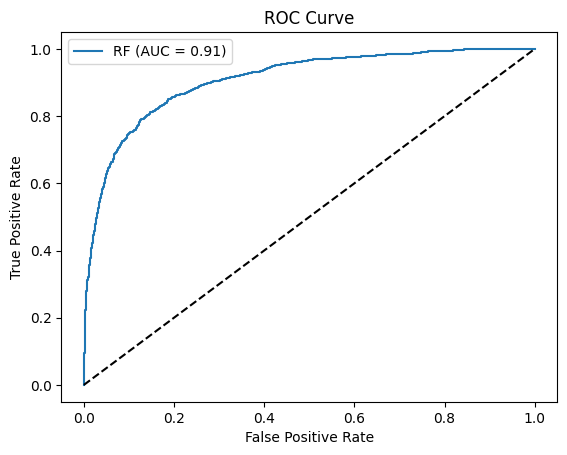

In [120]:
from sklearn.metrics import roc_curve, auc  # Import functions to compute ROC curve and AUC

# Predict probabilities of the positive class (class 1) for the validation set using the Random Forest model
probs = best_rf.predict_proba(X_val)[:, 1]

# Compute the false positive rate (fpr), true positive rate (tpr), and thresholds for different classification cutoffs
fpr, tpr, _ = roc_curve(y_val, probs)

# Calculate the Area Under the Curve (AUC) from the FPR and TPR values
roc_auc = auc(fpr, tpr)

# Plot the ROC curve: TPR vs FPR, with label showing AUC rounded to 2 decimals
plt.plot(fpr, tpr, label=f'RF (AUC = {roc_auc:.2f})')

# Plot a diagonal dashed line representing a random classifier (no skill)
plt.plot([0, 1], [0, 1], 'k--')

# Label x-axis as False Positive Rate
plt.xlabel('False Positive Rate')

# Label y-axis as True Positive Rate
plt.ylabel('True Positive Rate')

# Title for the plot
plt.title('ROC Curve')

# Show legend to display model and AUC
plt.legend()

# Display the plot
plt.show()


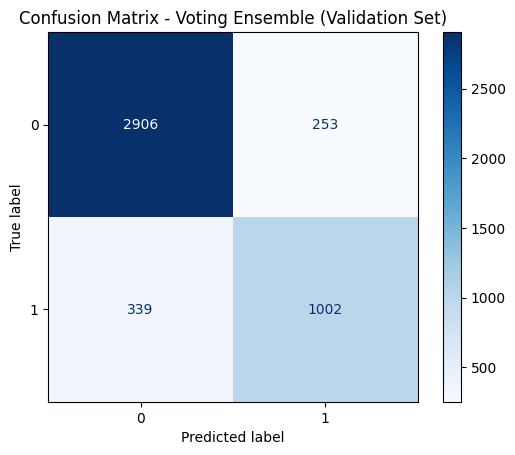

In [121]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on validation set
val_preds = ensemble.predict(X_val)

# Compute confusion matrix
cm = confusion_matrix(y_val, val_preds)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=ensemble.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Voting Ensemble (Validation Set)")
plt.show()

# 8. **Calibration and Interpretation**

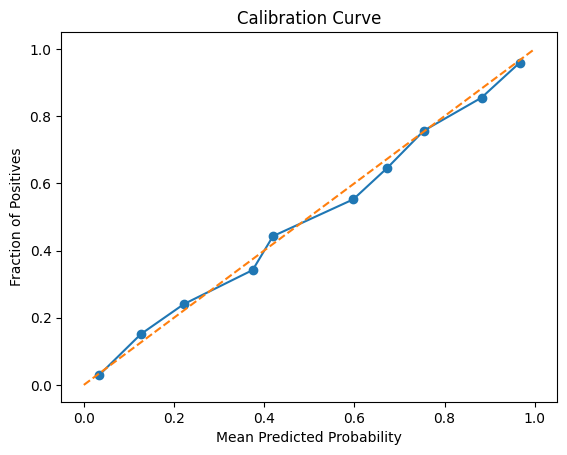

In [122]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve  # Import calibration tools

# Create a calibrated version of the ensemble classifier using isotonic regression and 5-fold CV
calibrated_ensemble = CalibratedClassifierCV(ensemble, method='isotonic', cv=5)

# Fit the calibrated model on the training data
calibrated_ensemble.fit(X_train, y_train)

# Predict calibrated probabilities on the validation set for the positive class
prob_pos = calibrated_ensemble.predict_proba(X_val)[:, 1]

# Calculate the calibration curve: x is mean predicted probability per bin, y is fraction of positives in each bin
x, y = calibration_curve(y_val, prob_pos, n_bins=10)

# Plot the calibration curve points
plt.plot(x, y, marker='o')

# Plot the ideal calibration line (perfect calibration) as a dashed diagonal
plt.plot([0, 1], [0, 1], linestyle='--')

# Set plot title
plt.title('Calibration Curve')

# Label x-axis (model’s predicted probability)
plt.xlabel('Mean Predicted Probability')

# Label y-axis (true fraction of positive labels)
plt.ylabel('Fraction of Positives')

# Show the plot
plt.show()

# 9. **Final Prediction for Test Data**

In [123]:
# Use the calibrated ensemble model to predict the class labels on the scaled test dataset
y_predict_ensemble = calibrated_ensemble.predict(X_test_scaled)

# Convert the predicted labels into a pandas Series with the name 'y_predict_ensemble'
predictions_series = pd.Series(y_predict_ensemble, name='y_predict_ensemble')

# Save the predictions to a CSV file named 'y_predict_ensemble.csv' without including the index column
predictions_series.to_csv('y_predict_ensemble.csv', index=False)


# 10. **Logistic Regression Model**

In [124]:
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression model

# Initialize Logistic Regression with:
# max_iter=1000 to allow sufficient iterations for convergence,
# class_weight='balanced' to handle imbalanced classes by adjusting weights,
# random_state=42 for reproducibility of results.
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Train the logistic regression model using the training data features and labels
log_reg.fit(X_train, y_train)

# Predict the target variable on the validation dataset using the trained model
y_pred_logreg = log_reg.predict(X_val)

# Calculate balanced accuracy score on the validation predictions
# Balanced accuracy accounts for imbalanced classes by averaging recall obtained on each class
logreg_score = balanced_accuracy_score(y_val, y_pred_logreg)

# Print the balanced accuracy of the logistic regression model on the validation set
print("Logistic Regression Balanced Accuracy:", logreg_score)

Logistic Regression Balanced Accuracy: 0.7998272752187741


# 11. **Compare Models**

In [125]:
# Compare the balanced accuracy of logistic regression (logreg_score)
# with the balanced accuracy of the ensemble model predictions on validation set (val_preds)

if logreg_score > balanced_accuracy_score(y_val, val_preds):
    # If logistic regression has higher balanced accuracy, print that it performs better
    print("Logistic Regression performs better.")
else:
    # Otherwise, print that the ensemble model performs better and will be selected
    print("Ensemble model performs better and is selected.")


Ensemble model performs better and is selected.


**You will not be able to run the code below as you do not have access to `y_test`**.

In [126]:
# do not run this code
y_test = pd.read_csv("y_test.csv")

balanced_accuracy = balanced_accuracy_score(y_true = y_test, y_pred = y_predict_ensemble)

print(f'Final balanced accuracy: {balanced_accuracy:.6f}')

FileNotFoundError: [Errno 2] No such file or directory: 'y_test.csv'